In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import panel as pn
import os
import ipywidgets as widgets
import requests
from requests import api
from dotenv import load_dotenv
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\siddh\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pn.extension("plotly")
import plotly.express as px

In [3]:
#Country Codes
country_currency = api.get('http://country.io/currency.json').json()

# countries2 = api.get('https://restcountries.eu/rest/v2/').json()
# countries2

In [4]:
df_country_currency = pd.DataFrame(columns=['Code', 'Curr_code'], dtype=object)
for key,value in country_currency.items():
    df_country_currency = df_country_currency.append(pd.Series(
    [
        key,
        value
    ], index= df_country_currency.columns ), ignore_index=True)

In [5]:
df_country_currency.set_index('Code',inplace=True)
df_country_currency.head()

,Curr_code
Code,
BD,BDT
BE,EUR
BF,XOF
BG,BGN
BA,BAM


In [6]:
#Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=AUD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=AUD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

# Gathering Crypto Data

In [7]:
# Fetch current BTC price
btc_price = requests.get(btc_url)

# Fetch current ETH price
eth_price = requests.get(eth_url)

btc_response = btc_price.content
eth_response = eth_price.content

btc_data = btc_price.json()
eth_data = eth_price.json()

btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

eth_data



{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116580674,
   'total_supply': 116580674,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2271.22,
     'volume_24h': 24074880125,
     'market_cap': 266036408402,
     'percentage_change_1h': -2.86687362306415,
     'percentage_change_24h': -1.0012994645322,
     'percentage_change_7d': 8.8001995013881,
     'percent_change_1h': -2.86687362306415,
     'percent_change_24h': -1.0012994645322,
     'percent_change_7d': 8.8001995013881}},
   'last_updated': 1625566467}},
 'metadata': {'timestamp': 1625566467,
  'num_cryptocurrencies': 1277,
  'error': None}}

In [8]:
df = pd.DataFrame(columns=['crypto', 'USD', 'AUD'], index=None)

In [9]:
df = df.append(pd.Series(['ETH', eth_price, '12000'], index= df.columns), ignore_index=True)
df = df.append(pd.Series(['BTC', btc_price, '32000'], index= df.columns), ignore_index=True)
df

,crypto,USD,AUD
0,ETH,2271.22,12000
1,BTC,34076.00,32000


In [10]:
df.set_index('crypto', inplace=True)
df

,USD,AUD
crypto,,
ETH,2271.22,12000
BTC,34076.00,32000


In [12]:
def f(x):
#     return eth_price * x
    global df['USD'] = df['USD'] * x
    global df['AUD'] = df['AUD'] * x
    
    fig = plt.figure()

    scat = plt.scatter( )
    return 

SyntaxError: invalid syntax (<ipython-input-12-730945bdcbde>, line 3)

In [13]:
widgets.interact(f, x=(0, 100))
output = widgets.Output()

NameError: name 'f' is not defined

In [14]:
# Compute current value of my crpto
#my_btc_value = my_btc * btc_price

# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f)

NameError: name 'f' is not defined

In [21]:
slider = widgets.IntSlider(value=50, min=1, max=50,  continuous_update=False)
slider.style.handle_color="lawngreen"
slider

IntSlider(value=50, continuous_update=False, max=50, min=1, style=SliderStyle(handle_color='lawngreen'))

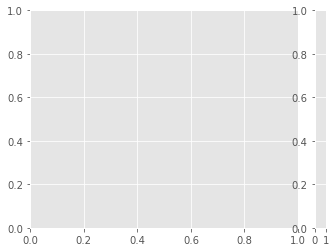

In [22]:
output = widgets.Output()

with output:
    with plt.style.context("ggplot"):
        fig = plt.figure()
#         scat = plt.scatter(x=iris_df[:50]['sepal length (cm)'],
#                            y=iris_df[:50]['petal length (cm)'],
#                            c=iris_df[:50]["FlowerType"]
#                           )
        plt.colorbar(df)
        plt.xlabel("sepal length (cm)".capitalize())
        plt.ylabel("petal length (cm)".capitalize())
        plt.title("sepal length (cm) vs petal length (cm) Relation")


In [23]:
def update_scatter_chart(new_slider_val):
    with output:
        with plt.style.context("ggplot"):
            fig = plt.figure()
#             plt.scatter(x=df.index,
#                         y=[df['USD'], df['AUD']])
            plt.colorbar(df)
            plt.xlabel("Date")
            plt.ylabel("Price ($)")
            plt.title("Line Chart for Apple Prices");
            fig.canvas.draw()

slider.observe(update_scatter_chart, names="value")


In [24]:
slider_label = widgets.Label("Number of Ethereum to buy")
slider_comp = widgets.HBox([slider_label, slider])
widgets.VBox([slider_comp, output])

In [ ]:
print(np.__version__)

In [ ]:
print(pd.__version__)

In [26]:
a = widgets.FloatSlider()
b = widgets.FloatText()

display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatSlider(value=0.0)

FloatText(value=0.0)

In [ ]:
w= interactive_plot()

In [27]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [36]:
df_crypto = ['BTC', 'ETH', 'LTC', 'XRP']
df_curr = ['USD', 'AUD', 'EUR']

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

columns=['a','b','c']
data = np.cumsum(np.random.rand(10,3),axis=1)
df = pd.DataFrame(data,columns=columns)

def g(x,y):
    print(x)
    print(y)
    plt.scatter(df[x], df[y])
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Dropdown(description='y',…